In [123]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

In [124]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
stop_words = set(stopwords.words("english"))

In [127]:
extra_words = {
    "years", "old", "height", "meter", "kg", "cm", "color", "eye", "hair",
    "male", "female", "working", "job", "govt", "assistant", "professor",
    "true", "false", "children", "brown", "black", "white", "pale", "dark",
    "student", "person", "occupation", "weight", "actor", "leo", "english",
    "telugu", "japanese", "american", "native", "language", "study"
}

In [128]:
file_path = "/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Lab 6/Person_Data.xlsx"

In [129]:
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [130]:
df

,Sno,Person,Attributes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1.0,A,Funny,Mature,Understanding,Kind,Short tempered,Intellegent,Hard working,Ambitions,...,Caring,Emotionaally Distant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Dad,Hard working,Caring,Progressive Mind,Honest,Holy Person,Loyal,Trustwarthy,Self Confidance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Mother,Loving,Helping,Emotional,Strong,Short tempered,Short Height,Hard working,Best Cook,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beautiful
3,4.0,Rohit,Professional,Casual in study,Low Marks,shortcut study,Humorous,standup comedian,makes fun of everyone,Helpful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,B,Voilent,Kind,Handsome,Funny,Intelligent,Sportsman,Slim,Romantic,...,Writer,Honest,Rich,Caring,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Pratyush Kumar,Short,thin,tempered,Hero,funny,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,C,Funny,Smart,Rich,no emotions,agrees to everything,Supportive,Understanding,Compromising,...,Helping,selfless,simple,relational,reasonable,NaN,NaN,NaN,NaN,NaN
7,8.0,D,Helping Nature,Ignorance,Short tempered,Caring,Foodie,Reader,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Suresh,Socialist,Geedy about new thing,Awareness,Overcomig failure,Male,19 years old,5.7 Height,weight-62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Sreekar,6 feet,65 kg,male,Vijaywada AP,Likes Cricket,Skill: Play with Keyboard,Reader,Likes Movies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
data = df.iloc[:, 1:]

In [132]:
data

,Person,Attributes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,A,Funny,Mature,Understanding,Kind,Short tempered,Intellegent,Hard working,Ambitions,Courageous,Caring,Emotionaally Distant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dad,Hard working,Caring,Progressive Mind,Honest,Holy Person,Loyal,Trustwarthy,Self Confidance,Emotion less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mother,Loving,Helping,Emotional,Strong,Short tempered,Short Height,Hard working,Best Cook,Caring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beautiful
3,Rohit,Professional,Casual in study,Low Marks,shortcut study,Humorous,standup comedian,makes fun of everyone,Helpful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B,Voilent,Kind,Handsome,Funny,Intelligent,Sportsman,Slim,Romantic,Loyal,Writer,Honest,Rich,Caring,NaN,NaN,NaN,NaN,NaN,NaN
5,Pratyush Kumar,Short,thin,tempered,Hero,funny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C,Funny,Smart,Rich,no emotions,agrees to everything,Supportive,Understanding,Compromising,Good Memory,Helping,selfless,simple,relational,reasonable,NaN,NaN,NaN,NaN,NaN
7,D,Helping Nature,Ignorance,Short tempered,Caring,Foodie,Reader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Suresh,Socialist,Geedy about new thing,Awareness,Overcomig failure,Male,19 years old,5.7 Height,weight-62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sreekar,6 feet,65 kg,male,Vijaywada AP,Likes Cricket,Skill: Play with Keyboard,Reader,Likes Movies,Fav Mov: Inception,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
data.drop([16],axis=0,inplace=True)

In [134]:
data.reset_index(drop=True, inplace=True)

In [135]:
data

,Person,Attributes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,A,Funny,Mature,Understanding,Kind,Short tempered,Intellegent,Hard working,Ambitions,Courageous,Caring,Emotionaally Distant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dad,Hard working,Caring,Progressive Mind,Honest,Holy Person,Loyal,Trustwarthy,Self Confidance,Emotion less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mother,Loving,Helping,Emotional,Strong,Short tempered,Short Height,Hard working,Best Cook,Caring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beautiful
3,Rohit,Professional,Casual in study,Low Marks,shortcut study,Humorous,standup comedian,makes fun of everyone,Helpful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B,Voilent,Kind,Handsome,Funny,Intelligent,Sportsman,Slim,Romantic,Loyal,Writer,Honest,Rich,Caring,NaN,NaN,NaN,NaN,NaN,NaN
5,Pratyush Kumar,Short,thin,tempered,Hero,funny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C,Funny,Smart,Rich,no emotions,agrees to everything,Supportive,Understanding,Compromising,Good Memory,Helping,selfless,simple,relational,reasonable,NaN,NaN,NaN,NaN,NaN
7,D,Helping Nature,Ignorance,Short tempered,Caring,Foodie,Reader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Suresh,Socialist,Geedy about new thing,Awareness,Overcomig failure,Male,19 years old,5.7 Height,weight-62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sreekar,6 feet,65 kg,male,Vijaywada AP,Likes Cricket,Skill: Play with Keyboard,Reader,Likes Movies,Fav Mov: Inception,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
def preprocess_attributes(attributes):
    cleaned_attributes = set()
    for attr in attributes:
        if isinstance(attr, str):  # Ensure it's a valid string
            attr = attr.lower().strip()  # Convert to lowercase and strip spaces
            attr = re.sub(r'[^a-zA-Z ]+', '', attr)  # Remove numbers and special characters
            words = attr.split()
            filtered_words = [word for word in words if word not in stop_words and word not in extra_words]
            if filtered_words:
                cleaned_attributes.add(" ".join(filtered_words))  # Reconstruct phrase

    return cleaned_attributes

In [137]:
def create_person_attribute_dict(df):
    person_dict = {}

    for _, row in df.iterrows():
        person = row.iloc[0]  # First element is the name
        attributes = row.iloc[1:].dropna().tolist()  # Drop NaN values and get attributes
        person_dict[person] = preprocess_attributes(attributes)

    return person_dict

In [138]:
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - (intersection / union) if union != 0 else 1

In [139]:
def compute_pairwise_distances(person_dict):
  persons = list(person_dict.keys())
  distances = []
  for p1, p2 in combinations(persons, 2):
    distance = jaccard_distance(person_dict[p1], person_dict[p2])
    distances.append(distance)
  return distances

In [140]:
def compute_percentage_of_pairs(thresholds, distances):
  percentages = []
  for threshold in thresholds:
    count = sum(1 for d in distances if d <= threshold)
    percentage = (count / len(distances)) * 100
    percentages.append(percentage)
  return percentages

In [141]:
def plot_linear_plot(x, y, x_label, y_label, title):
  plt.plot(x, y, marker='o')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.grid(True)
  plt.show()

In [142]:
person_attribute_dict = create_person_attribute_dict(data)

In [143]:
person_attribute_dict

{'A': {'ambitions',
  'caring',
  'courageous',
  'emotionaally distant',
  'funny',
  'hard',
  'intellegent',
  'kind',
  'mature',
  'short tempered',
  'understanding'},
 'Dad': {'caring',
  'emotion less',
  'hard',
  'holy',
  'honest',
  'loyal',
  'progressive mind',
  'self confidance',
  'trustwarthy'},
 'Mother': {'beautiful',
  'best cook',
  'caring',
  'emotional',
  'hard',
  'helping',
  'loving',
  'short',
  'short tempered',
  'strong'},
 'Rohit': {'casual',
  'helpful',
  'humorous',
  'low marks',
  'makes fun everyone',
  'professional',
  'shortcut',
  'standup comedian'},
 'B': {'caring',
  'funny',
  'handsome',
  'honest',
  'intelligent',
  'kind',
  'loyal',
  'rich',
  'romantic',
  'slim',
  'sportsman',
  'voilent',
  'writer'},
 'Pratyush Kumar': {'funny', 'hero', 'short', 'tempered', 'thin'},
 'C': {'agrees everything',
  'compromising',
  'emotions',
  'funny',
  'good memory',
  'helping',
  'reasonable',
  'relational',
  'rich',
  'selfless',
  'sim

In [144]:
distances = compute_pairwise_distances(person_attribute_dict)

In [145]:
distances

[0.8888888888888888,
 0.8333333333333334,
 1.0,
 0.8571428571428572,
 0.9333333333333333,
 0.9130434782608696,
 0.8666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9285714285714286,
 1.0,
 1.0,
 1.0,
 0.9444444444444444,
 0.9047619047619048,
 0.9615384615384616,
 0.9411764705882353,
 0.9473684210526316,
 0.8461538461538461,
 1.0,
 1.0,
 1.0,
 0.9583333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 0.9565217391304348,
 1.0,
 1.0,
 0.9411764705882353,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 0.9411764705882353,
 1.0,
 0.8823529411764706,
 1.0,
 0.8421052631578947,
 1.0,
 1.0,
 0.9285714285714286,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9375,
 0.95,
 0.9583333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9545454545454546,
 1.0,
 1.0,
 0.9333333333333333,
 1.0,
 0.9473684210526316,
 0.9523809523809523,
 0.9375,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9473684210526316,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9545454545454546,
 0.9285714285714286,
 0.956

In [146]:
thresholds = np.arange(0, 1.05, 0.05)

In [147]:
percentages = compute_percentage_of_pairs(thresholds, distances)

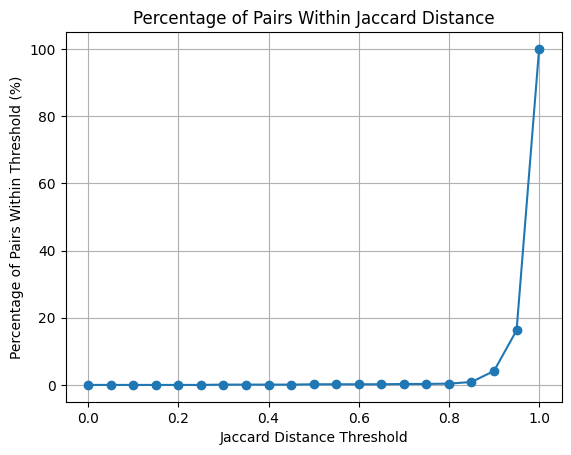

In [148]:
x = thresholds
y = percentages
x_label = 'Jaccard Distance Threshold'
y_label = 'Percentage of Pairs Within Threshold (%)'
title = 'Percentage of Pairs Within Jaccard Distance'

plot_linear_plot(x, y, x_label, y_label, title)

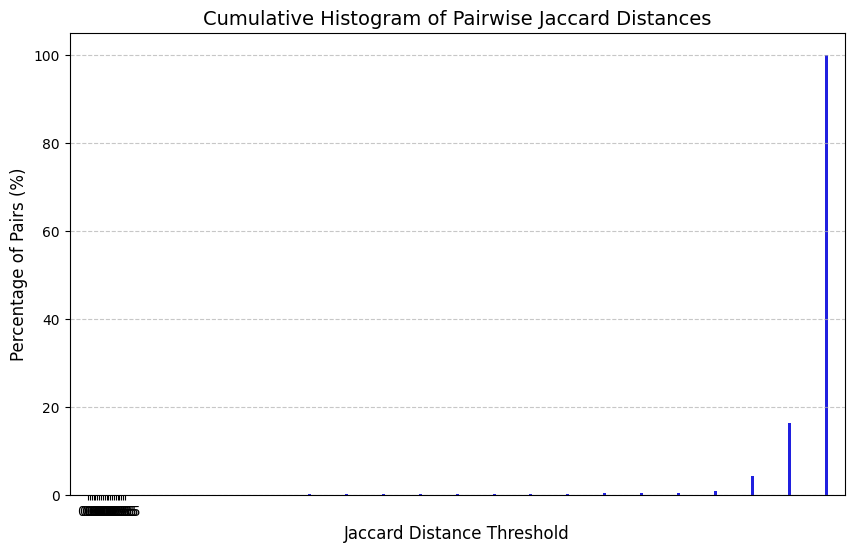

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x=thresholds, y=percentages, color="blue", width=0.08)

# Labels and Titles
plt.xlabel("Jaccard Distance Threshold", fontsize=12)
plt.ylabel("Percentage of Pairs (%)", fontsize=12)
plt.title("Cumulative Histogram of Pairwise Jaccard Distances", fontsize=14)
plt.xticks(thresholds)  # Ensure all bins are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()